In [80]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
from sklearn import metrics

#----------------------------------------
# Inicio transformación de datos
#----------------------------------------

#----------------------------------------
#Transformacion y limpieza del tamaño de instalacion
def sizes_trans(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None
    
#-----------------------------------------
#Transformacion del número de descargas(Installs)
def installs_trans(inst):
    try:
        x = (inst[:-1].replace(",",""))
        x = int(x)
        #return x
    except ValueError:
        print("Line is corrupt!", x)
        x = 0
    return np.log10(x)

#----------------------------------------
def rating_bynary_trans(rate):
    if rate < 4.5:
        return 0
    else:
        return 1

#----------------------------------------
#Transformacion del Tipo de app(Free/No Free) a binario
def type_trans(types):
    if types == 'Free':
        return 0
    else:
        return 1

#----------------------------------------
#Transformar Fecha a numero (last update)
def date_trans(date_str):
    date_time_obj = datetime.datetime.strptime(date_str, '%B %d, %Y')
    return date_time_obj.timestamp()


#----------------------------------------
#Transformacion de los precios a int
def price_trans(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        if price == "veryone":
            price = 0
        price = float(price)
        return price
    
#----------------------------------------
#Transformacion de las reviews a float
def review_trans(rev):
    if 'M' in rev:
        x = rev[:-1]
        x = float(x)*1000000
        return(np.log10(x))
    elif 'k' == rev[-1:]:
        x = rev[:-1]
        x = float(x)*1000
        return(np.log10(x))
    else:
        return (np.log10(float(rev)))
    
#----------------------------------------
def transform_data(data):
    #Rellenando los vacios
    data.Size.fillna(method = 'ffill', inplace = True)
    
    #Transformacion de las categorias a int
    CategoryString = data["Category"]
    categoryVal = data["Category"].unique()
    categoryValCount = len(categoryVal)
    category_dict = {}
    for i in range(0, categoryValCount):
        category_dict[categoryVal[i]] = i
    data["Category_i"] = data["Category"].map(category_dict).astype(int)
    
    #Tamaño de instals
    data["Size"] = data["Size"].map(sizes_trans)

    #Rating
    data["High_Rated"] = data["Rating"].map(rating_bynary_trans)
    
    #Installs
    data["Installs"] = data["Installs"].map(installs_trans)
    
    #Transformacion del "Content Rating" a enteros por cada valor unico
    RatingL = data["Content Rating"].unique()
    RatingDict = {}
    for i in range(len(RatingL)):
        RatingDict[RatingL[i]] = i
    data["Content Rating"] = data["Content Rating"].map(RatingDict).astype(int)
    
    #Free/No free
    data["Type"] = data["Type"].map(type_trans)
    
    #Transformacion de los "Genres" a int
    GenresL = data.Genres.unique()
    GenresDict = {}
    for i in range(len(GenresL)):
        GenresDict[GenresL[i]] = i
    data["Genres_i"] = data["Genres"].map(GenresDict).astype(int)
    
    #Last update
    data["Last Updated"] = data["Last Updated"].map(date_trans).astype(float)
    
    #Precios
    data["Price"] = data["Price"].map(price_trans).astype(float)
    
    #Reviews
    data["Reviews"] = data["Reviews"].map(review_trans).astype(float)
    
    #Eliminando los parametros que no utilizaremos ya que no son relevantes
    data.drop(labels = ["Last Updated","Current Ver", 'Android Ver', 'App', 'Genres', 'Category'], axis = 1, inplace = True)
    
    return data

d = pd.read_csv('data/googleplaystore.csv')
d = d.dropna()
d = transform_data(d)
d = d.reset_index(drop=True)
d.drop(labels = ['Type', 'Category_i', 'Genres_i', 'Content Rating', 
                    'Size', 'Rating', 'Price'], axis = 1, inplace = True)
d.info()

# -----------------------------
# Fin transformación de datos
# -----------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 3 columns):
Reviews       9360 non-null float64
Installs      9360 non-null float64
High_Rated    9360 non-null int64
dtypes: float64(2), int64(1)
memory usage: 219.5 KB


9360


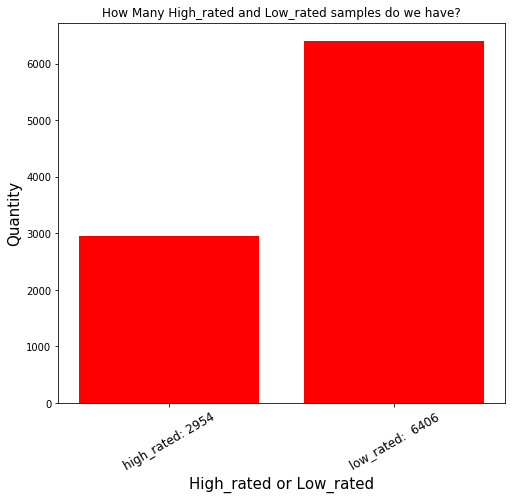

In [81]:
#Representamos la cantidad de muestras de ejmplo que son high_rated o low_rated
print(len(d))
highRated = []
lowRated = []

for cl in d["High_Rated"]:
    if cl==0:
        lowRated.append(cl)
    else:
        highRated.append(cl)

xBars = ['high_rated: ' + str(len(highRated)), 'low_rated:  ' + str(len(lowRated))]        
ancho = 0.8
fig, ax = plt.subplots(figsize=(8,7))
index = np.arange(len(xBars))
plt.bar(index, [len(highRated), len(lowRated)], ancho, color='red')
plt.xlabel('High_rated or Low_rated', fontsize=15)
plt.ylabel('Quantity', fontsize=15)
plt.xticks(index, xBars, fontsize=12, rotation=30)
plt.title('How Many High_rated and Low_rated samples do we have?')
plt.savefig('High_rated and Low_rated.png')
#Mayor número de muestras comestibles que venenosas, como se puede observar en la gráfica

In [87]:
d.head(50)

,Reviews,Installs,High_Rated
0,2.201397,4.00000,0
1,2.985426,5.69897,0
2,4.942058,6.69897,1
3,5.333737,7.69897,1
4,2.985426,5.00000,0
5,2.222716,4.69897,0
6,2.250420,4.69897,0
7,4.566025,6.00000,0
8,4.139596,6.00000,0
9,2.082785,4.00000,1


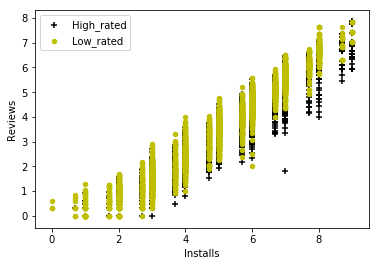

In [88]:
def dibuja_graf(D, legend, xLabel, yLabel):
    pos0 = np.where(D["High_Rated"] == 0)
    pos1 = np.where(D["High_Rated"] == 1)
    
    i = 0
    
    highRatedI = []
    highRatedR = []
    lowRatedI = []
    lowRatedR = []
    
    while i < len(D):
        if(D["High_Rated"][i] == 0):
            lowRatedR.append(D["Reviews"][i])
            lowRatedI.append(D["Installs"][i])
        else:
            highRatedR.append(D["Reviews"][i])
            highRatedI.append(D["Installs"][i])
        i += 1
    
    plt.scatter(lowRatedI, lowRatedR, marker='+', c = 'k', s=30)
    plt.scatter(highRatedI, highRatedR, marker='o', c = 'y', s=20)
    plt.legend(legend)

    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    
dibuja_graf(d, ['High_rated', 'Low_rated'], 'Installs', 'Reviews')

In [89]:
# ------------------------------
# Regresion Logistica
# ------------------------------

def RegresionLogistica(data):
    from scipy.optimize import fmin_tnc as tnc
    from matplotlib import pyplot as plt
    from sklearn.preprocessing import PolynomialFeatures as pf
    import sys

    learning_rate = 1.0
    POLY = 3

    def poli_f(X, grado):
        poly = pf(grado)
        return poly, poly.fit_transform(X)

    def J(theta, X, Y):
        m = np.shape(X)[0]
        n = np.shape(X)[1]
        theta = np.reshape(theta, (1, n))
        v1 = np.dot(np.transpose((np.log(g(np.dot(X, np.transpose(theta)))))), Y)
        v2 = np.dot(np.transpose((np.log(1 - g(np.dot(X, np.transpose(theta)))))), (1 - Y))
        v3 = (learning_rate/(2*m)) * np.sum(theta[1:]**2)
        return (((-1/m)*(v1 + v2)) + v3)

    def gradient(theta, X, Y):
        m = np.shape(X)[0]
        n = np.shape(X)[1]
        theta = np.reshape(theta, (1, n))
        var1 = np.transpose(X)
        var2  = g(np.dot(X, np.transpose(theta)))-Y
    
        theta = np.c_[[0], theta[:, 1:]]
        var3 = (learning_rate/m) * theta
        return ((1/m) * np.dot(var1, var2)) + np.transpose(var3)

    def g(z):
        return 1/(1 + np.exp(-z))

    def draw_data(X, Y):
        pos = np.where(Y == 0)[0] #vector with index of the Y = 1
        plt.scatter(X[pos, 0], X[pos, 1], marker='.', c='r')
        pos = np.where(Y == 1)[0].ravel() #vector with index of the Y = 1
        plt.scatter(X[pos, 0], X[pos, 1], marker='.', c='y')

    def draw_decision_boundary(theta, X, Y, poly):
        x0_min, x0_max = X[:,0].min(), X[:,0].max()
        x1_min, x1_max = X[:,1].min(), X[:,1].max()
        xx1, xx2 = np.meshgrid(np.linspace(x0_min, x0_max), np.linspace(x1_min, x1_max))
        
        sigm = g(poly.fit_transform(np.c_[ xx1.ravel(), xx2.ravel()]).dot(theta))
        sigm = sigm.reshape(xx1.shape)

        plt.contour(xx1, xx2, sigm, [0.5], linewidths = 1, colors = 'g')

    def draw(theta, X, Y, poly):
        plt.figure(figsize=(12,7))
        draw_data(X, Y)
        draw_decision_boundary(theta, X, Y, poly)
        plt.show()

    def load_csv_svm(file_name, features):
        dataFile = pd.read_csv(file_name, header = 0)

        dataFile = dataFile.fillna(0)
        y = dataFile['Rating'].array

        X = np.array([])
        X = np.reshape(X, (len(y), 0))
        for i in range(len(features)):
            X = np.c_[X, dataFile[features[i]].array]

        return X, y

    def load_Data(data, y_feat, features):
        #if y_feat == "Rating":
        #    data[y_feat] = data[y_feat].map(rating_bynary_trans)

        y = data[y_feat].array

        X = np.array([])
        X = np.reshape(X, (len(y), 0))
        for i in range(len(features)):
            X = np.c_[X, data[features[i]].array]
        return X, y

    def doIt(data):
        X, y = load_Data(data, "High_Rated", ["Reviews", "Installs"])
        X = np.array(X)
        y = np.array(y)
        y = np.reshape(y, (np.shape(y)[0], 1))
        poly, X_poly = poli_f(X, POLY)
        theta = np.zeros([1, np.shape(X_poly)[1]], dtype=float)
        theta = tnc(func=J, x0=theta, fprime=gradient, args=(X_poly,y))[0]
        draw(theta, X, y, poly)
        
    doIt(data)

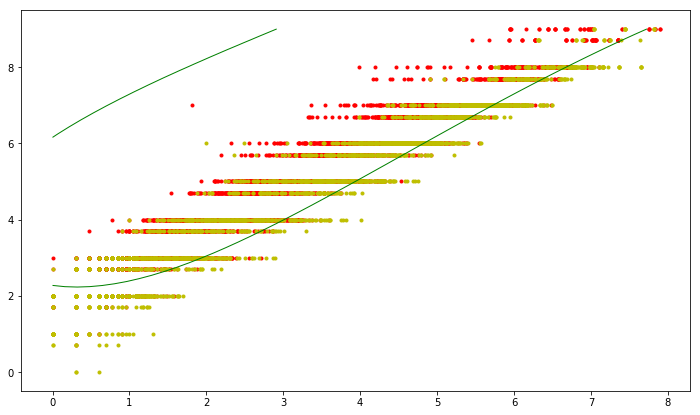

In [90]:
RegresionLogistica(d)

In [91]:
# ------------------------------
# Red Neuronal
# ------------------------------

def RedNeuronal(data):
    from scipy.optimize import minimize as sciMin
    from scipy.io import loadmat

    lambda_ = 1
    
    def load_csv(dataFile):
        y = dataFile['High_Rated'].array
        dataFile = dataFile.drop(['High_Rated'], axis = 1).values
        return dataFile, y
    
    def g(z):
        """
        1/ 1 + e ^ (-0^T * x)
        """
        return 1/(1 + np.exp(-z))
    
    def derivada_de_G(z):
        result = g(z) * (1 - g(z))
        return result
    
    def pesos_aleat(L_in, L_out):
        pesos = np.random.uniform(-0.12, 0.12, (L_out, 1+L_in))

        return pesos
    
    def transform_y(y, num_etiquetas):
        #y = np.reshape(y, (np.shape(y)[0], 1))
        mask = np.empty((num_etiquetas, np.shape(y)[0]), dtype=bool)
        for i in range( num_etiquetas):
            mask[i, :] = ((y[:, 0] + num_etiquetas - 1) % num_etiquetas == i) 
            #codificado con el numero 1 en la posicion 0 y el numero 0 en la posicion 9

        mask = mask * 1

        return np.transpose(mask)
    
    def J(X, y, a3, num_etiquetas, theta1, theta2):
        m = np.shape(X)[0]
        aux1 = -y * (np.log(a3))
        aux2 = (1 - y) * (np.log(1 - a3))
        aux3 = aux1 - aux2
        aux4 = np.sum(theta1**2) + np.sum(theta2**2)
        #print (aux4)
        return (1/m) * np.sum(aux3) + (lambda_/(2*m)) * aux4
    
    def forward_propagate(X, theta1, theta2):
        m = X.shape[0]
        a1 = np.hstack([np.ones([m, 1]), X])
        z2 = np.dot(a1, theta1.T)
        a2 = np.hstack([np.ones([m, 1]), g(z2)])
        z3 = np.dot(a2, theta2.T)
        h = g(z3)
        return a1, z2, a2, z3, h
    
    def add_column_left_of_matrix(matrix):
            new_matrix = np.hstack([np.ones([np.shape(matrix)[0], 1]), matrix]) #convention in linear regr
            return new_matrix
    
    def propagation(a1, theta1, theta2):
        a1 = add_column_left_of_matrix(a1)
        a2 = g(np.dot(a1, np.transpose(theta1)))      
        a2 = add_column_left_of_matrix(a2)
        a3 = g(np.dot(a2, np.transpose(theta2)))

        return a1, a2, a3

    
    def backdrop(params_rn, num_entradas, num_ocultas, num_etiquetas, X, y, reg):
        """
        return coste y gradiente de una red neuronal de dos capas
        """
        theta1 = np.reshape(params_rn[:num_ocultas*(num_entradas + 1)], 
            (num_ocultas, (num_entradas + 1)))
        theta2 = np.reshape(params_rn[num_ocultas*(num_entradas + 1):], 
            (num_etiquetas, (num_ocultas + 1)))

        #--------------------PASO1---------------------------------------
    
        a1, a2, a3 = propagation(X, theta1, theta2)
        m = np.shape(X)[0]
        delta_3 = a3 - y # (5000, 10)
        #--------------------PASO2---------------------------------------
        #delta_3 = a3 - y # (5000, 10)
        delta_matrix_1 = np.zeros(np.shape(theta1))
        delta_matrix_2 = np.zeros(np.shape(theta2))

        aux1 = np.dot(delta_3, theta2) #(5000, 26)
        aux2 = add_column_left_of_matrix(derivada_de_G(np.dot(a1, np.transpose(theta1))))
        delta_2 = aux1 * aux2 #(5000, 26)
        delta_2 = np.delete(delta_2, [0], axis=1) #(5000, 25)

        # #--------------------PASO4---------------------------------------

        delta_matrix_1 = delta_matrix_1 + np.transpose(np.dot(np.transpose(a1), delta_2)) #(25, 401)
        delta_matrix_2 = delta_matrix_2 + np.transpose(np.dot(np.transpose(a2), delta_3)) #(10, 26)
        #--------------------PASO6---------------------------------------
        delta_matrix_1 = (1/m) * delta_matrix_1
        delta_matrix_1[:, 1:] = delta_matrix_1[:, 1:] + (reg/m) * theta1[:, 1:] 

        delta_matrix_2 = (1/m) * delta_matrix_2
        delta_matrix_2[:, 1:] = delta_matrix_2[:, 1:] + (reg/m) * theta2[:, 1:] 


        cost = J(X, y, a3, num_etiquetas, theta1, theta2)
        gradient = np.concatenate((np.ravel(delta_matrix_1), np.ravel(delta_matrix_2)))

        return cost, gradient
    
    def checkLearned(y, outputLayer):     
        checker = (outputLayer > 0.7) 
        count = np.size(np.where(checker[:, 0] == y[:, 0])) 
        fin = count/np.shape(y)[0] * 100
        return fin, checker

    def doIt(data):
        X, y = load_csv(data)
        X = np.array(X)
        y = np.array(y)
        y = np.reshape(y, (np.shape(y)[0], 1))

        # ------------------------------
        legendPos = np.where(y == 1)
        legendX = X[legendPos[0]]

        normiePos = np.where(y == 0)
        normieX = X[normiePos[0]]
        # ------------------------------

        num_entradas = np.shape(X)[1]
        num_ocultas = 25
        num_etiquetas = 1

        theta1 = pesos_aleat(num_entradas, num_ocultas)
        theta2 = pesos_aleat(num_ocultas, num_etiquetas)

        theta_vector = np.concatenate((np.ravel(theta1), np.ravel(theta2)))

        thetas = sciMin(fun=backdrop, x0=theta_vector,
         args=(num_entradas, num_ocultas, num_etiquetas, X, y, lambda_),
         method='TNC', jac=True,
         options={'maxiter': 70}).x

        theta1 = np.reshape(thetas[:num_ocultas*(num_entradas + 1)], 
                (num_ocultas, (num_entradas + 1)))
        theta2 = np.reshape(thetas[num_ocultas*(num_entradas + 1):], 
                (num_etiquetas, (num_ocultas + 1)))
        a, c = checkLearned(y, forward_propagate(X, theta1, theta2)[4])

        #b = c
        print("Precision de la red neuronal: " + str(a) + " %")
    doIt(d)